In [2]:
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install citipy

In [18]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from scipy import stats
from config import api_key
from random import uniform

# to find a city based on longitude and latitude
from citipy import citipy

In [19]:
# x, y = uniform(-180,180), uniform(-90, 90)

# def newpoint():
#    return uniform(-180,180), uniform(-90, 90)

# the_points = (newpoint() for x in range(15))
# for points in the_points:
# #    print(point)

In [20]:
# Create a set of random lat and lng combinations
lat_lngs =[]
lats = np.random.uniform(low=-90.000, high=90.000, size=1300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1300)
lat_lngs = zip(lats, lngs)
# print(*lat_lngs)

In [21]:
# create a list to hold the cities
cities =[]

# Identify nearest city for each lat, lng combination
# for point in points:
#     city = citipy.nearest_city(point[0], point[1]).city_name
    
for points in lat_lngs:
    city = citipy.nearest_city(points[0], points[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#     print(cities) 
# check the city count to make sure we have at least 500
len(cities)
#print(cities)


532

In [22]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

# set up lists to hold reponse info and city counter
city_weather = []
city_cnt = 1

print(f"There are {len(cities)}")
for city in cities:
    print(f"City number {city_cnt} is {city}")
    try:
        response = requests.get(query_url + city).json()
        city_lat = response['coord']['lat']
        city_mtemp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_cloudiness = response['clouds']['all']
        city_wspeed = response['wind']['speed']
        city_weather.append({"city":city,
                      "Latitude":city_lat,
                      "Max Temp":city_mtemp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
        print(f"{city} processed successfully")
        city_cnt +=1
        
    except KeyError:
        print(f'No data for {city}. Skipping {city}')
        city_cnt +=1
          

There are 532
City number 1 is hithadhoo
hithadhoo processed successfully
City number 2 is tual
tual processed successfully
City number 3 is busselton
busselton processed successfully
City number 4 is podgorica
podgorica processed successfully
City number 5 is dingle
dingle processed successfully
City number 6 is ushuaia
ushuaia processed successfully
City number 7 is yar-sale
yar-sale processed successfully
City number 8 is hasaki
hasaki processed successfully
City number 9 is bluff
bluff processed successfully
City number 10 is grand river south east
No data for grand river south east. Skipping grand river south east
City number 11 is luba
luba processed successfully
City number 12 is albany
albany processed successfully
City number 13 is decin
decin processed successfully
City number 14 is nha trang
nha trang processed successfully
City number 15 is hobart
hobart processed successfully
City number 16 is port alfred
port alfred processed successfully
City number 17 is guerrero negro


garissa processed successfully
City number 138 is nizhneyansk
No data for nizhneyansk. Skipping nizhneyansk
City number 139 is toliary
No data for toliary. Skipping toliary
City number 140 is georgiyevka
georgiyevka processed successfully
City number 141 is recklinghausen
recklinghausen processed successfully
City number 142 is bambous virieux
bambous virieux processed successfully
City number 143 is castro
castro processed successfully
City number 144 is khatanga
khatanga processed successfully
City number 145 is pingliang
pingliang processed successfully
City number 146 is karasjok
karasjok processed successfully
City number 147 is barentsburg
No data for barentsburg. Skipping barentsburg
City number 148 is cayenne
cayenne processed successfully
City number 149 is thinadhoo
thinadhoo processed successfully
City number 150 is gizo
gizo processed successfully
City number 151 is tawkar
No data for tawkar. Skipping tawkar
City number 152 is puerto ayora
puerto ayora processed successfull

avera processed successfully
City number 275 is mhango
mhango processed successfully
City number 276 is havoysund
havoysund processed successfully
City number 277 is touros
touros processed successfully
City number 278 is qaanaaq
qaanaaq processed successfully
City number 279 is yaring
yaring processed successfully
City number 280 is arrifes
arrifes processed successfully
City number 281 is sri aman
sri aman processed successfully
City number 282 is broken hill
broken hill processed successfully
City number 283 is port elizabeth
port elizabeth processed successfully
City number 284 is aquiraz
aquiraz processed successfully
City number 285 is poum
poum processed successfully
City number 286 is kashan
kashan processed successfully
City number 287 is mayumba
mayumba processed successfully
City number 288 is dunhua
dunhua processed successfully
City number 289 is suntar
suntar processed successfully
City number 290 is lagoa
lagoa processed successfully
City number 291 is aksarka
aksarka pr

alice springs processed successfully
City number 409 is effingham
effingham processed successfully
City number 410 is talnakh
talnakh processed successfully
City number 411 is tarudant
No data for tarudant. Skipping tarudant
City number 412 is miri
miri processed successfully
City number 413 is meyungs
No data for meyungs. Skipping meyungs
City number 414 is tilichiki
tilichiki processed successfully
City number 415 is havelock
havelock processed successfully
City number 416 is rantepao
rantepao processed successfully
City number 417 is chapais
chapais processed successfully
City number 418 is virpur
virpur processed successfully
City number 419 is formosa
formosa processed successfully
City number 420 is bridgetown
bridgetown processed successfully
City number 421 is bairiki
bairiki processed successfully
City number 422 is ambulu
ambulu processed successfully
City number 423 is okha
okha processed successfully
City number 424 is srandakan
srandakan processed successfully
City number 

In [23]:
#create a dataframe for plotting
city_weather_df = pd.DataFrame(city_weather)

city_weather_df

city  Latitude  Max Temp  Humidity  Cloudiness  Wind Speed
0              hithadhoo     -0.60     84.74        64         100        5.99
1                   tual     -5.67     79.66        85           5       16.46
2              busselton    -33.65     55.99        94          98        5.01
3              podgorica     42.44     82.40        39          77       11.41
4                 dingle     11.00     88.59        63          35        7.87
..                   ...       ...       ...       ...         ...         ...
482            tazovskiy     67.47     61.23        57           0       14.99
483  nakhon si thammarat      8.43     95.00        53          20        3.36
484             meulaboh      4.14     86.58        69          91        5.12
485                shaki     41.08     84.20        37           0        2.24
486           strezhevoy     60.73     77.00        44          98        4.47

[487 rows x 6 columns]

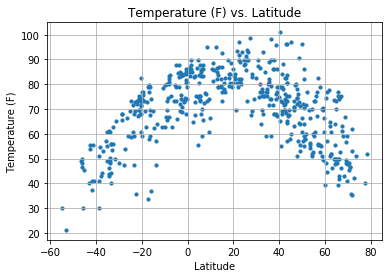

<Figure size 432x288 with 0 Axes>

In [24]:
# Temperature (F) vs. Latitude Plot
plt.scatter(city_weather_df ["Latitude"], city_weather_df ["Max Temp"], marker="o", s=10)

# plot labels, x and y
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Plots/Temp_vs_Latitude.png")



In [25]:
# The data is showing that the temperature trends warmer in the cities in the latitudes between 0 and 40.

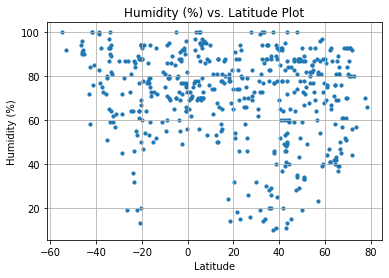

<Figure size 432x288 with 0 Axes>

In [26]:
# Humidity (%) vs. Latitude Plot
plt.scatter(city_weather_df ["Latitude"], city_weather_df ["Humidity"], marker="o", s=10)

# plot labels, x and y
plt.title("Humidity (%) vs. Latitude Plot")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Plots/Humidity_vs_Latitude.png")

In [27]:
# This data shows that there can be high humidity in all latitudes

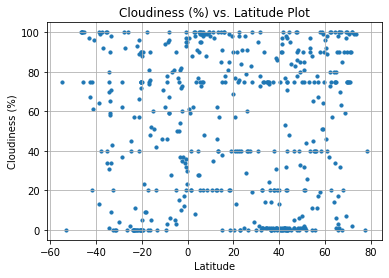

<Figure size 432x288 with 0 Axes>

In [28]:
# Cloudiness (%) vs. Latitude Plot
plt.scatter(city_weather_df ["Latitude"], city_weather_df ["Cloudiness"], marker="o", s=10)

# plot labels, x and y
plt.title("Cloudiness (%) vs. Latitude Plot")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Plots/Cloudiness_vs_Latitude.png")

In [29]:
# This data shows that cloudiness varies in all latitudes

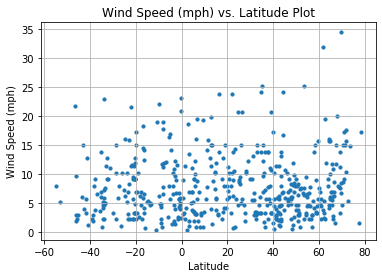

<Figure size 432x288 with 0 Axes>

In [30]:
# Wind Speed (mph) vs. Latitude
plt.scatter(city_weather_df ["Latitude"], city_weather_df ["Wind Speed"], marker="o", s=10)

# plot labels, x and y
plt.title("Wind Speed (mph) vs. Latitude Plot")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Plots/Wind_vs_Latitude.png")

In [31]:
# This data shows that winds are mostly below 10 mph in all latitudes

In [32]:
# Save a CSV of all retrieved data
city_weather_df.to_csv("city_weather_data.csv")

In [33]:
# Perform a linear regression on Northern Hemisphere - Temperature (F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_weather_df ["Latitude"], city_weather_df ["Max Temp"])

# Get regression values
regress_values = city_weather_df ["Latitude"] * slope + intercept
print(regress_values)

0      69.295466
1      69.214871
2      68.770089
3      69.979647
4      69.479864
         ...    
482    70.377535
483    69.439010
484    69.370815
485    69.958028
486    70.270393
Name: Latitude, Length: 487, dtype: float64


In [45]:
# Seperate the northern and southern Hemisphere
northern_cities = city_weather_df[(city_weather_df["Latitude"] >= 0)]
northern_cities


city  Latitude  Max Temp  Humidity  Cloudiness  Wind Speed
3              podgorica     42.44     82.40        39          77       11.41
4                 dingle     11.00     88.59        63          35        7.87
6               yar-sale     66.83     75.38        45          63        8.70
7                 hasaki     35.73     81.00        83          75       14.99
9                   luba      3.46     75.20       100          75        6.93
..                   ...       ...       ...       ...         ...         ...
482            tazovskiy     67.47     61.23        57           0       14.99
483  nakhon si thammarat      8.43     95.00        53          20        3.36
484             meulaboh      4.14     86.58        69          91        5.12
485                shaki     41.08     84.20        37           0        2.24
486           strezhevoy     60.73     77.00        44          98        4.47

[328 rows x 6 columns]

In [46]:
southern_cities = city_weather_df[(city_weather_df["Latitude"] < 0)]
southern_cities

city  Latitude  Max Temp  Humidity  Cloudiness  Wind Speed
0       hithadhoo     -0.60     84.74        64         100        5.99
1            tual     -5.67     79.66        85           5       16.46
2       busselton    -33.65     55.99        94          98        5.01
5         ushuaia    -54.80     30.20       100          75        8.05
8           bluff    -46.60     48.83        94         100       21.70
..            ...       ...       ...       ...         ...         ...
475          poya    -21.35     69.73        61          89        9.46
476   resistencia    -27.46     54.00        87          92        8.05
478       manyana    -23.40     47.50        46           0        3.20
480  quatre cocos    -20.21     73.99        94          75        9.17
481        pangai    -19.80     77.00        88          75       17.22

[159 rows x 6 columns]

In [50]:
# Perform a linear regression on Northern Hemisphere - Temperature (F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_cities ["Latitude"], northern_cities ["Max Temp"])

# Get regression values
regress_values = northern_cities ["Latitude"] * slope + intercept
# print(regress_values)

In [51]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.44x +88.98


The r-squared is: 0.4246112926768235


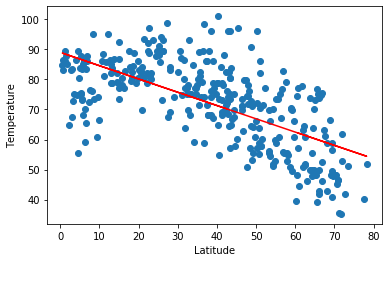

In [49]:
# Create Plot
plt.scatter(northern_cities ["Latitude"],northern_cities ["Max Temp"])
plt.plot(northern_cities ["Latitude"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

y = 0.83x +81.76
The r-squared is: 0.6186022483245907


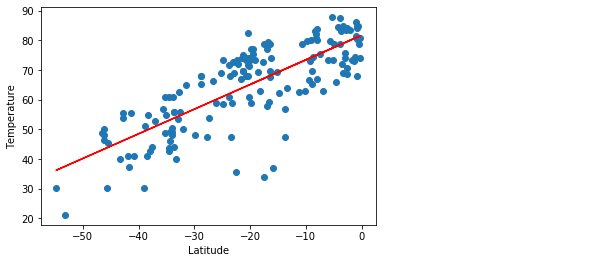

In [53]:
# Perform a linear regression on Southern Hemisphere - Temperature (F) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_cities ["Latitude"], southern_cities ["Max Temp"])

# Get regression values
s_regress_values = southern_cities ["Latitude"] * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(southern_cities ["Latitude"],southern_cities ["Max Temp"])
plt.plot(southern_cities ["Latitude"],s_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="green")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()